In [17]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
import warnings
warnings.filterwarnings("ignore")

In [18]:
# Loading the dataset
path = "C:/Users/Hi/Desktop/archive/Life-Expectancy-Data-Averaged.csv"  
data = pd.read_csv(path)

In [19]:
# Display basic information about the dataset
print("Dataset Head:\n", data.head())
print("\nDataset Info:\n")
data.info()

# Preprocessing
data = data.dropna()  # Dropping rows with missing values for simplifing
numerical_columns = data.select_dtypes(include=np.number).columns
data[numerical_columns] = (data[numerical_columns] - data[numerical_columns].mean()) / data[numerical_columns].std()

Dataset Head:
                Country                         Region    Year  Infant_deaths  \
0          Afghanistan                           Asia  2007.5       71.08125   
1              Albania                 Rest of Europe  2007.5       15.25625   
2              Algeria                         Africa  2007.5       26.75625   
3               Angola                         Africa  2007.5       88.76875   
4  Antigua and Barbuda  Central America and Caribbean  2007.5        9.47500   

   Under_five_deaths  Adult_mortality  Alcohol_consumption  Hepatitis_B  \
0           98.61250       265.804969             0.016125      64.5625   
1           17.14375        83.132969             4.696875      98.0000   
2           31.19375       113.439281             0.400625      88.3125   
3          144.16250       297.844063             4.935625      68.8125   
4           11.51875       142.478813             7.755000      98.2500   

   Measles       BMI    Polio  Diphtheria  Incidents_

In [20]:
print(data.isnull().sum())

Country                          0
Region                           0
Year                           179
Infant_deaths                    0
Under_five_deaths                0
Adult_mortality                  0
Alcohol_consumption              0
Hepatitis_B                      0
Measles                          0
BMI                              0
Polio                            0
Diphtheria                       0
Incidents_HIV                    0
GDP_per_capita                   0
Population_mln                   0
Thinness_ten_nineteen_years      0
Thinness_five_nine_years         0
Schooling                        0
Economy_status                   0
Life_expectancy                  0
dtype: int64


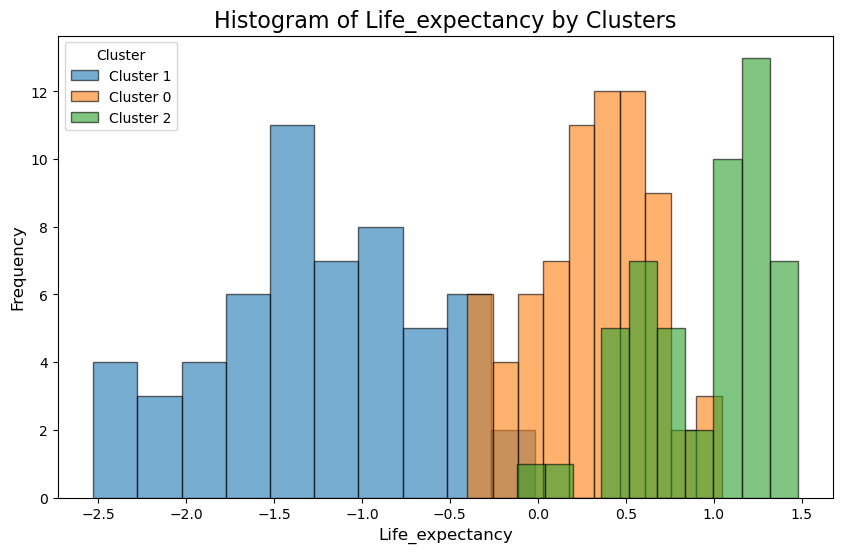

In [70]:
# -------- HISTOGRAM PLOT --------

from sklearn.preprocessing import StandardScaler

# Replace missing values for clustering (if any)
data = data.copy()  
numerical_columns = [
    "Infant_deaths", "Under_five_deaths", "Adult_mortality",
    "Alcohol_consumption", "Hepatitis_B", "Measles", "BMI",
    "Polio", "Diphtheria", "Incidents_HIV", "GDP_per_capita",
    "Population_mln", "Thinness_ten_nineteen_years",
    "Thinness_five_nine_years", "Schooling", "Life_expectancy"
]
data[numerical_columns] = data[numerical_columns].fillna(data[numerical_columns].mean())

# Standardizing the numerical data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_columns])

# Performing K-Means clustering
num_clusters = 3  # Define the number of clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

# Plotting histogram with clustering
def plot_histogram_with_clusters(data, column_name):
   
    if column_name not in data.columns or 'Cluster' not in data.columns:
        raise ValueError(f"Column '{column_name}' or 'Cluster' not found in dataset.")

    plt.figure(figsize=(10, 6))
    for cluster in data['Cluster'].unique():
        cluster_data = data[data['Cluster'] == cluster][column_name]
        plt.hist(
            cluster_data,
            bins=10,
            alpha=0.6,
            label=f"Cluster {cluster}",
            edgecolor='black'
        )

    plt.title(f"Histogram of {column_name} by Clusters", fontsize=16)
    plt.xlabel(column_name, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.legend(title='Cluster')
    plt.show()

# Displaying the histogram for 'Life_expectancy'
plot_histogram_with_clusters(data, 'Life_expectancy')

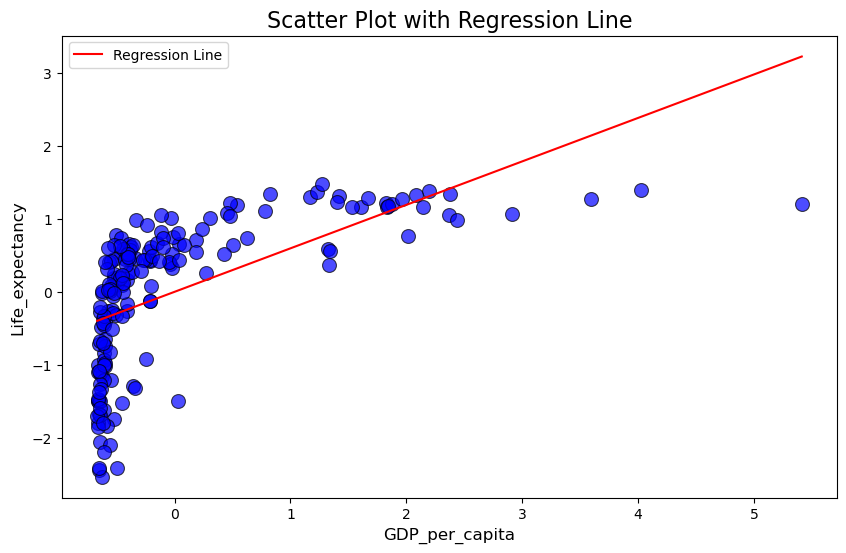

Regression Coefficients: 0.5949, Intercept: -0.0000


In [18]:
# -------- SCATTERPLOT --------

from sklearn.linear_model import LinearRegression

def plot_regression(data, x_col, y_col):
    # Ensure required columns exist
    required_columns = [x_col, y_col]
    for col in required_columns:
        if col not in data.columns:
            raise ValueError(f"Column '{col}' not found in dataset.")

    # Extracting data for regression
    X = data[[x_col]]
    y = data[y_col]

    # Ensuring there is no NaN values
    if X.isnull().any().any() or y.isnull().any():
        raise ValueError("Input data contains NaN values. Please clean the data before regression.")

    # Creating and fitting linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Predicting values for the regression line
    x_vals = np.linspace(X.min().values[0], X.max().values[0], 100)
    y_vals = model.predict(x_vals.reshape(-1, 1))

    # Scatter plot
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x=x_col, y=y_col, color='blue', alpha=0.7, s=100, edgecolor='k')

    # Adding regression line
    plt.plot(x_vals, y_vals, color='red', label='Regression Line')
    
    #Styling Plots
    plt.title("Scatter Plot with Regression Line", fontsize=16)
    plt.xlabel(x_col, fontsize=12)
    plt.ylabel(y_col, fontsize=12)
    plt.legend(loc='best')
    plt.show()

    # Printing model details
    print(f"Regression Coefficients: {model.coef_[0]:.4f}, Intercept: {model.intercept_:.4f}")
    return model


model = plot_regression(data, 'GDP_per_capita', 'Life_expectancy')


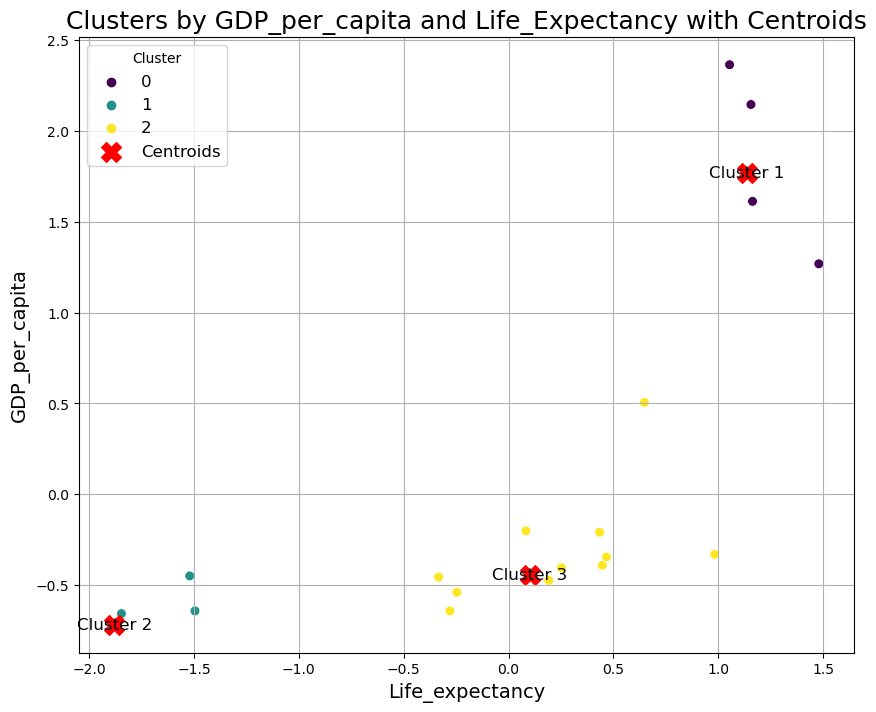

In [25]:
#-------- SCATTERPLOT WITH CLUSTER --------
from sklearn.preprocessing import StandardScaler

# Here we are clustering based on Life_expentancy and GDP_per_capita
numerical_columns = ['Life_expectancy', 'GDP_per_capita']

# We are using only these two columns for clustering
selected_data = data[numerical_columns]

# Reduce the size of the dataset 
sampled_data = selected_data.sample(frac=0.1, random_state=42)  


# Standardizing the data to have mean=0 and variance=1
scaler = StandardScaler()
scaled_features = scaler.fit_transform(sampled_data)

# Performing K-Means clustering on the scaled features
def perform_kmeans_clustering(scaled_data, num_clusters=3, random_state=42):
    
    # Initializing KMeans model with specified number of clusters and random state
    kmeans_model = KMeans(n_clusters=num_clusters, random_state=random_state)
    # Fitting the KMeans model to the scaled data and assign the cluster labels
    cluster_labels = kmeans_model.fit_predict(scaled_data)
    
    return kmeans_model, cluster_labels

# Visualizing the clusters and centroids
def plot_clusters(data, x_feature, y_feature, cluster_labels, centroids, plot_title='Clusters with Centroids'):
    
    # Adding the cluster labels as a new column in the original data for easy plotting
    data['Cluster'] = cluster_labels
    
    # Creating a scatter plot for the data points with their cluster labels
    plt.figure(figsize=(10, 8))  
    sns.scatterplot(data=data, x=x_feature, y=y_feature, hue='Cluster', palette='viridis', s=50)
    
    # Plot the centroids of the clusters as red 'X' marks
    plt.scatter(centroids[:, 0], centroids[:, 1], color='red', marker='X', s=200, label='Centroids')
    
    # Annotating each centroid with its cluster number
    for i, centroid in enumerate(centroids):
        plt.text(centroid[0], centroid[1], f'Cluster {i+1}', color='black', fontsize=12, ha='center', va='center')
    
    # Adding plot title and axis labels 
    plt.title(plot_title, fontsize=18)
    plt.xlabel(x_feature, fontsize=14)
    plt.ylabel(y_feature, fontsize=14)
    
    # Displaying the legend and grid 
    plt.legend(title='Cluster', fontsize=12)
    plt.grid()
    
    # Show the plot
    plt.show()

# Running the K-Means and visualizing the clusters
n_clusters = 3
kmeans_model, cluster_labels = perform_kmeans_clustering(scaled_features, num_clusters=n_clusters)

# Extracting the centroids (coordinates of the cluster centers)
centroids = kmeans_model.cluster_centers_

# Plotting the clusters and centroids
plot_clusters(sampled_data, 'Life_expectancy', 'GDP_per_capita', cluster_labels, centroids, plot_title='Clusters by GDP_per_capita and Life_Expectancy with Centroids')




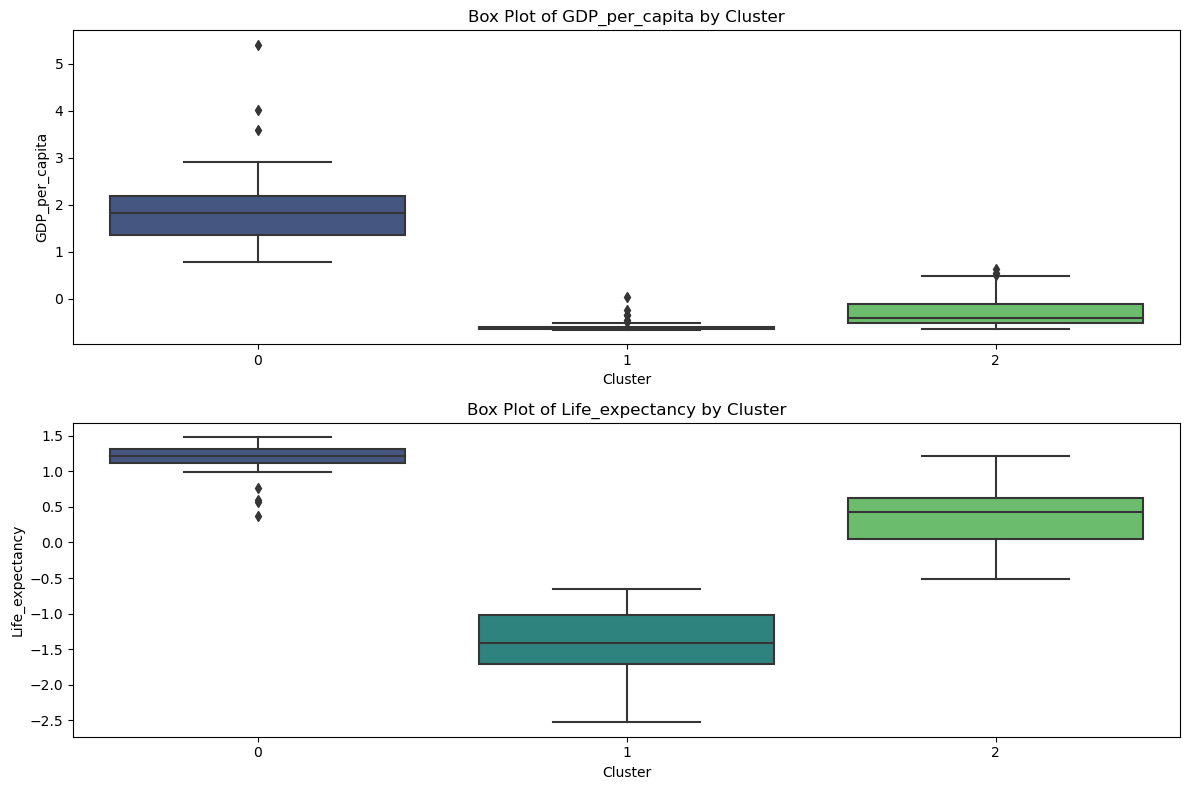

In [26]:
# -------- BOX PLOT --------
def plot_boxplot(data, numerical_columns, cluster_column='Cluster'):
    plt.figure(figsize=(12, 8))
    
    # Plotting box plots for each numerical column by cluster
    for i, col in enumerate(numerical_columns):
        plt.subplot(2, len(numerical_columns) // 2, i + 1)
        sns.boxplot(x=data[cluster_column], y=data[col], palette='viridis')
        plt.title(f"Box Plot of {col} by Cluster", fontsize=12)
        plt.xlabel('Cluster', fontsize=10)
        plt.ylabel(col, fontsize=10)
    plt.tight_layout()
    plt.show()


numerical_columns = ['GDP_per_capita', 'Life_expectancy']  
plot_boxplot(data, numerical_columns)


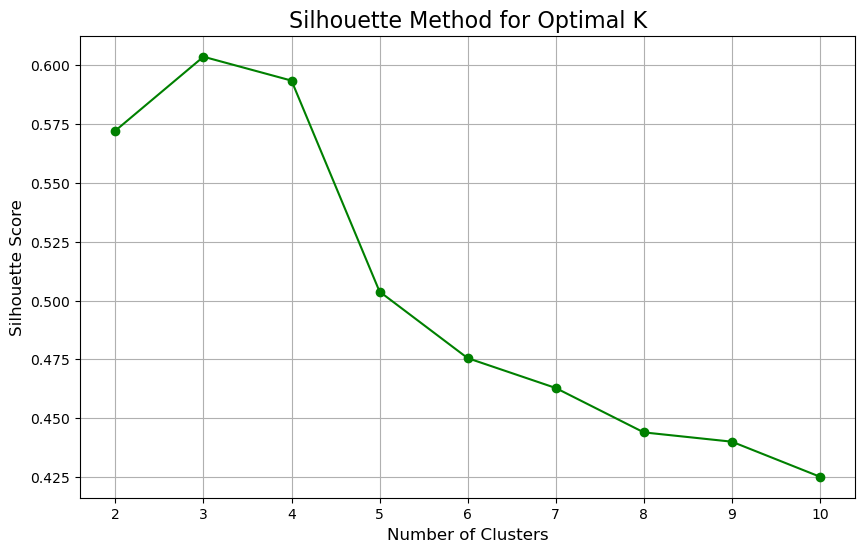

In [10]:
# -------- SILHOUETTE PLOT --------

from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer

def plot_silhouette_method(data, numerical_columns, max_clusters=10):
    imputer = SimpleImputer(strategy='mean')
    imputed_data = pd.DataFrame(
        imputer.fit_transform(data[numerical_columns]),
        columns=numerical_columns,
        index=data.index
    )

    silhouette_scores = []
    # Fit KMeans with different number of clusters and calculate silhouette score
    for i in range(2, max_clusters + 1):  
        kmeans = KMeans(n_clusters=i, random_state=42)
        clusters = kmeans.fit_predict(imputed_data)
        score = silhouette_score(imputed_data, clusters)
        silhouette_scores.append(score)

    # Plotting the Silhouette Scores
    plt.figure(figsize=(10, 6))
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='-', color='g')
    plt.title("Silhouette Method for Optimal K", fontsize=16)
    plt.xlabel("Number of Clusters", fontsize=12)
    plt.ylabel("Silhouette Score", fontsize=12)
    plt.xticks(range(2, max_clusters + 1))
    plt.grid(True)
    plt.show()

numerical_columns = ['GDP_per_capita', 'Life_expectancy'] 
plot_silhouette_method(data, numerical_columns)
